# Billboard Year-End Top 100 Songs Analysis

---

### **Group Members**
* Jaquan Jones
* Marie Karibyan
* Hagop (Christian) Arabian
* Nicol Barrios
* Ani Movsesian

---

### **Project Description**
In our project, we will use data top 100 song data provide from the [Billboard Year-End Top 100 Songs](https://www.billboard.com/charts/year-end/), in the years 2011-2020, provided by [Billboard](https://www.billboard.com/). We chose to use the top 100 song range of 2011-2020 considering music tends to be categorized by the decade (70s, 80s, 90s music etc). Each decade tends to have popular genres and a appear to have a trend in the evolving sound within each unique genres. Also, we noticed while planning the year range of our data initially that the sub-genres making up the general 'pop' (or popular) genre sound tends to evolve with time.

With help from the Spotify Web API, we will analyze the unique features of individual tracks to help determine if any unique feature or feature combinations influence the ranking of songs listed. We will use **Classification**, to determine if a songs rank within a top 10 list can be accurately predicted, specifically testing the accuracies of predicting if a song is within top 50, top 25, and top 10 range.

---
### **Project Details**
The following libraries will be used to perform classification on the dataset are the following:
* **NumPy** - To perform advanced mathematical operations on Array objects
* **pandas** - To read, manipulate, and process data in the form of Series and DataFrame structures
* **scikit-learn** - For various Machine Learning algorithms and classification methods on the dataset
* **Matplotlib** - For creating static, animated, and interactive visualizations of numerical data

We will compare the accuracy scores of performing the following classifications:
* **Decision Tree Classification**
* **KNN Classification**
* **Ensemble Learning (Bagging)**
* **Random Forest Classification**
* **Logistic Regression**

Our primary data set can be found [here](https://www.kaggle.com/subhaskumarray/spotify-tracks-data?select=tracks.csv). The dataset contains the track analysis of around 586,000+ total songs found on Spotify. Since we were specifically interested in the top 100 songs from billboard.com, we used the following libraries to gather a list of the songs we were looking for:
* **BeautifulSoup** - For parsing HTML data about each song found directly on billboard.com web pages
* **Spotipy** - For accessing Spotify's Web API using python
---

### Merging/Filtering the Data

By matching Spotify Song ID's of the gathered list of songs listed on billboard.com Year-End Top 100 Lists, years 2011-2020, we were able to filter only relevant songs from the original dataset containing track analysis of around 586,000+ total songs. Since accurately mathching Song ID's to the dataset we were capable of extending the original dataset to include the year the song was on the top 100 list and its rank on the list. We excluded columns from the original dataset that are not currently being provided by the Spotify Web API,columns that did not come directly come specifically from the *Get Track's Audio Features* endpoint, and columns having no analytical value (i.e. track_href, the url to the song). The link to our finalized dataset, filtering and enhancing the original dataset, can be found [here](https://raw.githubusercontent.com/jaquanjones/SpotifyMLGroupProject/main/datasets/merged_2011_2020_top_songs.csv).

---
### **Project Goals**
* Our **primary goal** is to determine if we can use each song's *track audio analysis features* to classify if a song's rank on the top 100 list is within a particular given range

* To begin, We will determine if using the songs Genres, which are initially formatted as a string, would be beneficial to include in the data set

* Next, We will explore the decision tree accuracy of various ranges, testing top 50, 25, and 10 ranges
* Following the determination of highest accuracy score initially returned by  Decision Tree Classification of top 50, top 25, and top 10 ranges, we will then perform KNN, Ensemble Learning (Bagging), Random Forest, and Logistic Regression on the initial most accurate top song range
* Furthermore, we will evaluate the data to discover any highly influential features or trends in the various classification methods.


### Libraries used



In [1]:
# base imports
import numpy as np
import pandas as pd

import math

from matplotlib import style, pyplot, figure

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.utils import resample
from sklearn import preprocessing

### Reading the Data

In [2]:
# read csv data of top 100 songs of 2011-2020 into dataframe
song_df = pd.read_csv(
    "https://raw.githubusercontent.com/jaquanjones/SpotifyMLGroupProject/main/datasets/merged_2011_2020_top_songs.csv")

song_df.head()

,Spotify ID,Title,Artists,Year,Rank,Genres,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,Top 100
0,1c8gk2PeTE04A1pIDH9YMk,Rolling in the Deep,Adele,2011,1,"british soul, pop, pop soul, uk pop",0.1380,0.730,0.769,0.0,8,0.0473,-5.114,1,0.0298,104.948,4,0.507,0
1,0IkKz2J93C94Ei4BvDop7P,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,2011,2,"dance pop, pop rap",0.0189,0.750,0.727,0.0,5,0.2660,-4.210,0,0.1420,129.993,4,0.359,0
2,4r6eNCsrZnQWJzzvFh4nlg,Firework,Katy Perry,2011,3,"dance pop, pop, pop rap, post-teen pop",0.1410,0.638,0.832,0.0,8,0.1130,-5.039,1,0.0490,124.071,4,0.648,0
3,36ux3YuUsGTWPT8fXclS45,E.T.,Katy Perry Featuring Kanye West,2011,4,"dance pop, pop, pop rap, post-teen pop, chicag...",0.0181,0.620,0.869,0.0,1,0.3690,-5.252,1,0.1750,151.684,4,0.760,0
4,4QNpBfC0zvjKqPJcyqBy9W,"Give Me Everything (feat. Ne-Yo, Afrojack & Na...","Pitbull Featuring Ne-Yo, Afrojack & Nayer",2011,5,"pop, pop rap, dance pop",0.1910,0.671,0.939,0.0,8,0.2980,-3.206,1,0.1610,129.024,4,0.530,0


In [3]:
# checking shape of song_df
song_df.shape

(905, 19)

### **Feature Column Details**
* **Spotify ID**
    * The Spotify ID for the track

* **Title**
    * The title of the song

* **Artists**
    * The artists featured on the song

* **Year**
    * The year the song ranked on the year-end top 100 songs list

* **Rank**
    * The song's ranking in the year-end top 100 songs chart

* **Genres**
    * The genres the song is listed under (may be multiple)

* **Acousticness**
    * A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

* **Danceability**
    * Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

* **Energy**
    * Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* **Instrumentalness**
    * Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* **Key**
    * The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

* **Liveness**
    * Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* **Loudness**
    * The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

* **Mode**
    * Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* **Speechiness**
    * Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* **Tempo**
    * The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

* **Time Signature**
    * An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

* **Valence**
    * A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).



In [4]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Spotify ID        905 non-null    object 
 1   Title             905 non-null    object 
 2   Artists           905 non-null    object 
 3   Year              905 non-null    int64  
 4   Rank              905 non-null    int64  
 5   Genres            905 non-null    object 
 6   Acousticness      905 non-null    float64
 7   Danceability      905 non-null    float64
 8   Energy            905 non-null    float64
 9   Instrumentalness  905 non-null    float64
 10  Key               905 non-null    int64  
 11  Liveness          905 non-null    float64
 12  Loudness          905 non-null    float64
 13  Mode              905 non-null    int64  
 14  Speechiness       905 non-null    float64
 15  Tempo             905 non-null    float64
 16  Time Signature    905 non-null    int64  
 1

### Converting the Data Types
* Using `convert_dtypes()` to convert the original data types to best suited data types
* Specifically, values unnecessarily `float64` changed to int64

In [5]:
song_df = song_df.convert_dtypes()

song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Spotify ID        905 non-null    string 
 1   Title             905 non-null    string 
 2   Artists           905 non-null    string 
 3   Year              905 non-null    Int64  
 4   Rank              905 non-null    Int64  
 5   Genres            905 non-null    string 
 6   Acousticness      905 non-null    float64
 7   Danceability      905 non-null    float64
 8   Energy            905 non-null    float64
 9   Instrumentalness  905 non-null    float64
 10  Key               905 non-null    Int64  
 11  Liveness          905 non-null    float64
 12  Loudness          905 non-null    float64
 13  Mode              905 non-null    Int64  
 14  Speechiness       905 non-null    float64
 15  Tempo             905 non-null    float64
 16  Time Signature    905 non-null    Int64  
 1

### Exploring Genre as a Feature
* The column Genres in the dataframe is initially given as a single string
* The following code parses the string into specific genre occurences
    * splitting genres at each `,` and stripping the trailing or leading whites space after the split creates the opportunity to create one list of all genres mentioned in the data set
* The genre list allows the following:
    1. creating a list of unique genres (by creating a set)
    2. counting the number of times each genre occurs
    3. counting how many songs have the unique genre listed in their Genre string
    4. 

In [6]:
# creating list of unique genres in genre column of dataset
genre_list = song_df['Genres'].to_list()

all_genres = []

for song_genres in genre_list:
    song_genres_list = str(song_genres).split(',')
    for song_genre in song_genres_list:
        all_genres.append(song_genre)

all_genres = [genre.strip() for genre in all_genres]

unique_genres_set = set(all_genres)
unique_genres_list = list(unique_genres_set)

print('The first 20 unique genres are:\n')
unique_genres_list[:20]

The first 20 unique genres are:



['reggae fusion',
 'uk pop',
 'southern hip hop',
 'pittsburgh rap',
 'korean old school hip hop',
 'vapor twitch',
 'nu metal',
 'uk contemporary r&b',
 'latin viral pop',
 'minnesota hip hop',
 'christian music',
 'pop rap',
 'canadian pop',
 'grime',
 'drill',
 'stomp pop',
 'modern blues rock',
 'new wave',
 'afro dancehall',
 'new orleans rap']

In [7]:
# displaying occurences of unique genre in song list
genre_occurences = {}

for genre in unique_genres_list:
    genre_occurences[genre] = all_genres.count(genre)

sorted_genres = sorted(genre_occurences.items(), key=lambda x: x[1], reverse=True)
sorted_genre_list = []

print('\'Name of Genre\': \'# of Songs W/ Genre\' (First 20)\n')
for genre, occurences in sorted_genres:
        sorted_genre_list.append([genre, occurences])
        # print(f'{genre}: {occurences}')

for i in range(20):
    print(f'{sorted_genre_list[i][0]}: {sorted_genre_list[i][1]}')

'Name of Genre': '# of Songs W/ Genre' (First 20)

pop: 509
dance pop: 332
rap: 224
pop rap: 203
hip hop: 114
trap: 107
post-teen pop: 100
contemporary country: 95
country: 80
country road: 73
canadian pop: 60
pop rock: 57
electropop: 55
southern hip hop: 54
modern rock: 52
melodic rap: 45
r&b: 43
urban contemporary: 42
rock: 38
uk pop: 36


Top 10 Genres:
	#1) pop: 509
	#2) dance pop: 332
	#3) rap: 224
	#4) pop rap: 203
	#5) hip hop: 114
	#6) trap: 107
	#7) post-teen pop: 100
	#8) contemporary country: 95
	#9) country: 80
	#10) country road: 73

Top 10 Genres Chart:


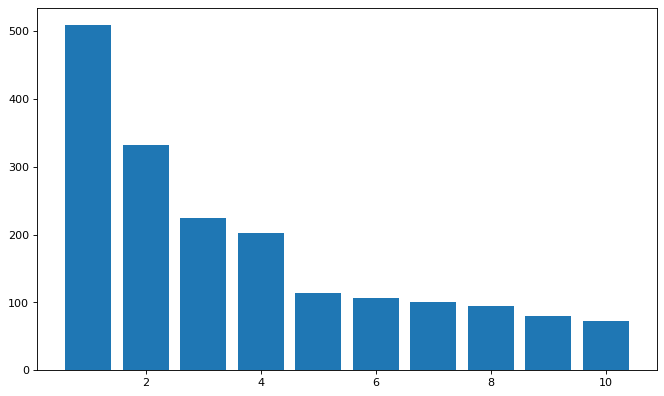

In [8]:
# Listing and visualizing the top 10 genre occurences

print('Top 10 Genres:')

for i in range(0,10):
    print(f'\t#{i+1}) {sorted_genre_list[i][0]}: {sorted_genre_list[i][1]}')


print('\nTop 10 Genres Chart:')

pyplot.figure(figsize=(10, 6), dpi=80)

pyplot.bar([x for x in range(1,11)], [sorted_genres[i][1] for i in range(10)] )
pyplot.show()

In [9]:
# testing to confirm if it would be beneficial to exclude the word 'pop' after first time
top_genres = []
word_occurences = []

for genre in sorted_genres:
    genre_break_down = genre[0].split(' ')
    # print(genre_break_down)

    if all(x not in word_occurences for x in genre_break_down):
        word_occurences += genre_break_down
        top_genres.append(genre[0])

top_10_genres = top_genres[:10]


print('The first 10 genres not including the word \'pop\':\n')
print(top_10_genres)

The first 10 genres not including the word 'pop':

['pop', 'rap', 'hip hop', 'trap', 'contemporary country', 'electropop', 'modern rock', 'r&b', 'edm', 'neo mellow']


In [10]:
top_genre_occurences = {}

for genre in top_10_genres[0:10]:
    top_genre_occurences[genre] = all_genres.count(genre)

print('The # of occurences of the first 10 genres not including the word \'pop\':\n')
for genre, occurence in top_genre_occurences.items():
    # sorted_genre_list.append([genre, occurences])
    print(f'\t{genre}: {occurence}')

The # of occurences of the first 10 genres not including the word 'pop':

	pop: 509
	rap: 224
	hip hop: 114
	trap: 107
	contemporary country: 95
	electropop: 55
	modern rock: 52
	r&b: 43
	edm: 29
	neo mellow: 25


In [11]:
# number of genres for each song
song_genres = song_df['Genres'].to_list()

song_genre_count = [len(str(genres).split(',')) for genres in song_genres]

song_df['Genre Count'] = song_genre_count
# print(song_genre_count)
song_df.head()

,Spotify ID,Title,Artists,Year,Rank,Genres,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,Top 100,Genre Count
0,1c8gk2PeTE04A1pIDH9YMk,Rolling in the Deep,Adele,2011,1,"british soul, pop, pop soul, uk pop",0.1380,0.730,0.769,0.0,8,0.0473,-5.114,1,0.0298,104.948,4,0.507,0,4
1,0IkKz2J93C94Ei4BvDop7P,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,2011,2,"dance pop, pop rap",0.0189,0.750,0.727,0.0,5,0.2660,-4.210,0,0.1420,129.993,4,0.359,0,2
2,4r6eNCsrZnQWJzzvFh4nlg,Firework,Katy Perry,2011,3,"dance pop, pop, pop rap, post-teen pop",0.1410,0.638,0.832,0.0,8,0.1130,-5.039,1,0.0490,124.071,4,0.648,0,4
3,36ux3YuUsGTWPT8fXclS45,E.T.,Katy Perry Featuring Kanye West,2011,4,"dance pop, pop, pop rap, post-teen pop, chicag...",0.0181,0.620,0.869,0.0,1,0.3690,-5.252,1,0.1750,151.684,4,0.760,0,6
4,4QNpBfC0zvjKqPJcyqBy9W,"Give Me Everything (feat. Ne-Yo, Afrojack & Na...","Pitbull Featuring Ne-Yo, Afrojack & Nayer",2011,5,"pop, pop rap, dance pop",0.1910,0.671,0.939,0.0,8,0.2980,-3.206,1,0.1610,129.024,4,0.530,0,3


In [12]:
# checking how many songs contain a 'top genre'
song_genre_dictionary = {}

contains_top_song = []

for i in range(0, len(song_genres)):
    song_genre_dictionary[i] = []
    song_genres_unformatted = song_genres[i].split(',')
    song_genres_formatted = [song.strip() for song in song_genres_unformatted]
    song_genre_dictionary[i] += song_genres_formatted


for genres_of_song in song_genre_dictionary.values():
    if any(x in top_genres for x in genres_of_song):
        contains_top_song.append(True)
    else:
        contains_top_song.append(False)
# print(contains_top_song)
print(f'Total number of songs: {len(contains_top_song)}')
print(f'\nNumber of songs that do not contain a \'top genre\' in its genres: {contains_top_song.count(False)}')

Total number of songs: 905

Number of songs that do not contain a 'top genre' in its genres: 59


* Originally checking if songs on the list did not contain a 'top genre', it was realized that since each song is categorized under multiple genres only 59 songs did not mention at least one of the top genres occuring, if not many
* Since genres is not numerical and only **59 songs** out of 905 songs **did not contain atleast 1 top genre**, we decided to exclude using genres as a feature label in our classification analysis

### Establishing Classifying Labels for Data

In [13]:
# we want to confirm if decision tree will be able to classify a song as
# top 50, top 25, and/or 10 rankings of it's year

rankings = song_df['Rank'].to_list()

rankings = [int(rank) for rank in rankings]

# print(rankings)

is_in_rank_range = lambda rank_range, rank: rank <= rank_range

song_df['Top 50'] = [is_in_rank_range(50,rankings[i]) for i in range(len(rankings))]
song_df['Top 25'] = [is_in_rank_range(25,rankings[i]) for i in range(len(rankings))]
song_df['Top 10'] = [is_in_rank_range(10,rankings[i]) for i in range(len(rankings))]

song_df[:15]

,Spotify ID,Title,Artists,Year,Rank,Genres,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,Top 100,Genre Count,Top 50,Top 25,Top 10
0,1c8gk2PeTE04A1pIDH9YMk,Rolling in the Deep,Adele,2011,1,"british soul, pop, pop soul, uk pop",0.13800,0.730,0.769,0.000000,8,0.0473,-5.114,1,0.0298,104.948,4,0.507,0,4,True,True,True
1,0IkKz2J93C94Ei4BvDop7P,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,2011,2,"dance pop, pop rap",0.01890,0.750,0.727,0.000000,5,0.2660,-4.210,0,0.1420,129.993,4,0.359,0,2,True,True,True
2,4r6eNCsrZnQWJzzvFh4nlg,Firework,Katy Perry,2011,3,"dance pop, pop, pop rap, post-teen pop",0.14100,0.638,0.832,0.000000,8,0.1130,-5.039,1,0.0490,124.071,4,0.648,0,4,True,True,True
3,36ux3YuUsGTWPT8fXclS45,E.T.,Katy Perry Featuring Kanye West,2011,4,"dance pop, pop, pop rap, post-teen pop, chicag...",0.01810,0.620,0.869,0.000000,1,0.3690,-5.252,1,0.1750,151.684,4,0.760,0,6,True,True,True
4,4QNpBfC0zvjKqPJcyqBy9W,"Give Me Everything (feat. Ne-Yo, Afrojack & Na...","Pitbull Featuring Ne-Yo, Afrojack & Nayer",2011,5,"pop, pop rap, dance pop",0.19100,0.671,0.939,0.000000,8,0.2980,-3.206,1,0.1610,129.024,4,0.530,0,3,True,True,True
5,2tJulUYLDKOg9XrtVkMgcJ,Grenade,Bruno Mars,2011,6,"dance pop, pop",0.14600,0.706,0.558,0.000000,2,0.1180,-7.237,0,0.0593,110.443,4,0.227,0,2,True,True,True
6,3hlksXnvbKogFdPbpO9vel,Super Bass,Nicki Minaj,2011,8,"dance pop, hip pop, pop, pop rap, queens hip hop",0.27100,0.723,0.860,0.000005,11,0.5980,-4.357,1,0.2030,126.979,4,0.667,0,5,True,True,True
7,7LcfRTgAVTs5pQGEQgUEzN,Moves Like Jagger - Studio Recording From The ...,Maroon 5 Featuring Christina Aguilera,2011,9,pop,0.01110,0.722,0.758,0.000000,11,0.3080,-4.477,0,0.0471,128.047,4,0.620,0,1,True,True,True
8,0xuXRQJfxmdP6gvfDe2Z4L,Just Can't Get Enough - 2006 Remaster,The Black Eyed Peas,2011,10,"dance rock, new romantic, new wave, permanent ...",0.41000,0.765,0.766,0.052000,0,0.1770,-9.374,1,0.0348,128.177,4,0.923,0,5,True,True,True
9,3C0nOe05EIt1390bVABLyN,On The Floor,Jennifer Lopez Featuring Pitbull,2011,11,"pop, pop rap, dance pop",0.10500,0.730,0.777,0.000478,3,0.0691,-5.194,0,0.0496,130.000,4,0.575,0,3,True,True,False


### Establishing Feature Matrix
* To specifically focus on the **features of the track audio analysis**, feature matrix `X` include: 
    * Acousticness
    * Danceability
    * Energy
    * Instrumentalness
    * Key
    * Liveness
    * Loudness
    * Mode
    * Speechiness
    * Tempo
    * Time Signature
    * Valence

In [14]:
feature_labels =   ['Acousticness', 'Danceability', 'Energy', 
                    'Instrumentalness', 'Key',  'Liveness', 'Loudness',
                    'Mode', 'Speechiness', 'Tempo', 'Time Signature', 'Valence']

X = song_df[feature_labels]
X.head()

,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence
0,0.1380,0.730,0.769,0.0,8,0.0473,-5.114,1,0.0298,104.948,4,0.507
1,0.0189,0.750,0.727,0.0,5,0.2660,-4.210,0,0.1420,129.993,4,0.359
2,0.1410,0.638,0.832,0.0,8,0.1130,-5.039,1,0.0490,124.071,4,0.648
3,0.0181,0.620,0.869,0.0,1,0.3690,-5.252,1,0.1750,151.684,4,0.760
4,0.1910,0.671,0.939,0.0,8,0.2980,-3.206,1,0.1610,129.024,4,0.530


# Classifications on Dataset

## 1) Decision Tree Classification
* Dataset **Labels**: 
    * `y1` : Track is **Top 50**
    * `y2` : Track is **Top 25**
    * `y3` : Track is **Top 10**

* Starting with Decision Tree Classification of each label range, we **will move forward classifying the data using the most accurate label range** between `y1`, `y2`, and `y3`

In [15]:
y1 = song_df['Top 50']
y2 = song_df['Top 25']
y3 = song_df['Top 10']

y1

0       True
1       True
2       True
3       True
4       True
       ...  
900    False
901    False
902    False
903    False
904    False
Name: Top 50, Length: 905, dtype: bool

### Keeping `test_size=0.25` and `random_state=3` constant for accurate comparisons across classifications

### Decision Tree Testing/Training using `y1`

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.25, random_state=3)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(678, 12)
(678,)
(227, 12)
(227,)


In [17]:
# method to obtain decision tree accuracy
def accuracy_of_decision_tree(rs, X_training, y_training, X_testing, y_testing):
        """Returning accuracy of predictions for Decision Tree classifier, 
        given training and testing data and a specific value of random state 
        value, rs"""

        # Create Instance of DecisionTreeClassifier passing parameter value 'rs'
        my_DecisionTree = DecisionTreeClassifier(random_state=rs)

        # Train model with "fit" method along with training dataset and labels
        my_DecisionTree.fit(X_training, y_training)

        # Generate label predictions vector
        y_predictions = my_DecisionTree.predict(X_testing)

        # print predictions for testing set
        # print('Predictions for testing set:\n')
        # print(y_predictions)

        return accuracy_score(y_testing, y_predictions)

In [18]:
# obtain accuracy of decision tree
random_state = 3

dt_accuracy = accuracy_of_decision_tree(random_state, X_train, y_train, X_test, y_test)

print(f'\nAccuracy of Decision Tree classifier for Top 50 prediction, random_state={random_state}: {dt_accuracy}')


Accuracy of Decision Tree classifier for Top 50 prediction, random_state=3: 0.6255506607929515


### Decision Tree Testing/Training using `y2`

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.25, random_state=3)

dt_accuracy = accuracy_of_decision_tree(random_state, X_train, y_train, X_test, y_test)

print(f'\nAccuracy of Decision Tree classifier for Top 25 prediction, random_state={random_state}: {dt_accuracy}')


Accuracy of Decision Tree classifier for Top 25 prediction, random_state=3: 0.7312775330396476


### Decision Tree Testing/Training using `y3`

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y3, test_size=0.25, random_state=3)

dt_accuracy = accuracy_of_decision_tree(random_state, X_train, y_train, X_test, y_test)

print(f'\nAccuracy of Decision Tree classifier for Top 10 prediction, random_state={random_state}: {dt_accuracy}')


Accuracy of Decision Tree classifier for Top 10 prediction, random_state=3: 0.8898678414096917


### Decision Tree Findings
* The prediction accuracy increased as the ranking range decreased
    * **May indicate commonality amongst top 10 songs' features**
* Since using `y3`, Top 10, provided most accurate classification of 0.8898678414096917, we **will perform remaining classifications using `y3` as the label**

## 2) KNN Classification
* Initially performing KNN Classification using K=3

In [21]:
selected_k = 3

In [22]:
# Returning accuracy of predictions for selected knn value
def accuracy_of_knn(k, X_training, y_training, X_testing, y_testing):

      # Create Instance of KNeighborsClassifier with parameter value of k
      selected_k = k 
      selected_knn = KNeighborsClassifier(n_neighbors=selected_k)
      
      # Train model with "fit" method along with training dataset and labels .
      selected_knn.fit(X_training, y_training)

      # Use "predict" method of the *trained* object selected_knn on testing set
      # Set 'y_prediction' to generated predictions for testing set
      y_predictions = selected_knn.predict(X_testing)

      # return overall accuracy of predicted labels vs actual values
      return accuracy_score(y_testing, y_predictions)

In [23]:
"""Ignore, implemented out of curiousity of accuracy"""
# y1 label = if a song is in the top 50
# X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.25, random_state=3)

# knn_3_top_50_accuracy = accuracy_of_knn(selected_k, X_train, y_train, X_test, y_test)

# print(f'- KNN Classification\n- k={selected_k}\n- Prediction Accuracy of if song is in top 50 of year-end rankings: {knn_3_top_50_accuracy}')

'Ignore, implemented out of curiousity of accuracy'

In [24]:
"""Ignore, implemented out of curiousity of accuracy"""
# y2 label = if a song is in the top 25
# X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.25, random_state=3)

# knn_3_top_25_accuracy = accuracy_of_knn(selected_k, X_train, y_train, X_test, y_test)

# print(f'- KNN Classification\n- k={selected_k}\n- Prediction Accuracy of if song is in top 25 of year-end rankings: {knn_3_top_25_accuracy}')

'Ignore, implemented out of curiousity of accuracy'

In [25]:
# y3 label = if a song is in the top 10
X_train, X_test, y_train, y_test = train_test_split(X, y3, test_size=0.25, random_state=3)

knn_3_top_10_accuracy = accuracy_of_knn(selected_k, X_train, y_train, X_test, y_test) 

print(f'- KNN Classification\n- k={selected_k}\n- Prediction Accuracy of if song is in top 10 of year-end rankings: {knn_3_top_10_accuracy}')

- KNN Classification
- k=3
- Prediction Accuracy of if song is in top 10 of year-end rankings: 0.8634361233480177


###Testing the variation of 'K' values for KNN Classificatoin

In [26]:
# values of K to test
k_test = [1, 3, 5, 7, 10, 15, 20]

results = {}

for k in k_test:
        results[k] = accuracy_of_knn(k, X_train, y_train, X_test, y_test)

print('Prediction Accuracy of if song is in top 10 of year-end rankings (with varying values of k):\n')
for key, value in results.items():
        print(f'\tFor K={key}, accuracy is: {value}\n')

Prediction Accuracy of if song is in top 10 of year-end rankings (with varying values of k):

	For K=1, accuracy is: 0.8325991189427313

	For K=3, accuracy is: 0.8634361233480177

	For K=5, accuracy is: 0.9030837004405287

	For K=7, accuracy is: 0.8898678414096917

	For K=10, accuracy is: 0.8942731277533039

	For K=15, accuracy is: 0.8942731277533039

	For K=20, accuracy is: 0.8942731277533039



* KNN Classification most accurate when using `K=5`

###Testing if any unique feature can produce accurate prediction independent of other features

In [27]:
# assign x0, ..., x11 to each feature column of song_df

x0 = song_df[[feature_labels[0]]]
x1 = song_df[[feature_labels[1]]]
x2 = song_df[[feature_labels[2]]]
x3 = song_df[[feature_labels[3]]]
x4 = song_df[[feature_labels[4]]]
x5 = song_df[[feature_labels[5]]]
x6 = song_df[[feature_labels[6]]]
x7 = song_df[[feature_labels[7]]]
x8 = song_df[[feature_labels[8]]]
x9 = song_df[[feature_labels[9]]]
x10 = song_df[[feature_labels[10]]]
x11 = song_df[[feature_labels[10]]]


feature_list = [x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10,x11]


In [28]:
# method to train models dynamically for each new isolated feature matrix
# using y3 since yields best accuracy
def find_feature_accuracy(x_col, k):
        X_train, X_test, y_train, y_test = train_test_split(x_col, y3, test_size=0.25, random_state=3)
        return accuracy_of_knn(k, X_train, y_train, X_test, y_test)

In [29]:
# dictionary to map name of feature to accuracy of feature column data
# using k = 5 since yielded best accuracy

feature_results = {}

for i in range(0,11):
        feature_results[feature_labels[i]] = find_feature_accuracy(feature_list[i], 5)

most_accurate_feature = ''
best_accuracy = 0
for key, value in feature_results.items():
        if value > best_accuracy:
            most_accurate_feature = key
            best_accuracy = value
        print(f'For feature \'{key}\', accuracy is: {value}\n')


print(f'Most Accurate Feature: {most_accurate_feature}\nAccuracy: {best_accuracy}\n')

For feature 'Acousticness', accuracy is: 0.8766519823788547

For feature 'Danceability', accuracy is: 0.8810572687224669

For feature 'Energy', accuracy is: 0.8766519823788547

For feature 'Instrumentalness', accuracy is: 0.8986784140969163

For feature 'Key', accuracy is: 0.8942731277533039

For feature 'Liveness', accuracy is: 0.8810572687224669

For feature 'Loudness', accuracy is: 0.8810572687224669

For feature 'Mode', accuracy is: 0.8942731277533039

For feature 'Speechiness', accuracy is: 0.8810572687224669

For feature 'Tempo', accuracy is: 0.8898678414096917

For feature 'Time Signature', accuracy is: 0.8942731277533039

Most Accurate Feature: Instrumentalness
Accuracy: 0.8986784140969163



* From the results it appears **Instrumentalness** provided most accurate prediction at 0.8986784140969163
* Features with accuracy above 0.89 also included:
    * Key
    * Mode
    * Time Signature
* **All runner-up features scored same accuracy** of 0.8942731277533039

###Testing if any unique combination of two features produce better accuracy than most accurate independent features and if pair producing best accuracy include a combination of the 4 most accurate independent features 

In [30]:
# create pair list for indexing each unique pair of feature labels
pair_indexes = []
for i in range(0,11):
    for j in range(i+1,12):
        pair_indexes.append([i, j])

In [31]:
# method to train models dynamically for each new feature pair matrix
def find_feature_pair_accuracy(index1, index2, k):
        feature_pair = song_df[[feature_labels[index1], feature_labels[index2]]]
        X_train, X_test, y_train, y_test = train_test_split(feature_pair, y3, test_size=0.25, random_state=3)
        return accuracy_of_knn(k, X_train, y_train, X_test, y_test)

In [32]:
# pass pairs of features to feature pair accuracy method
accuracy_by_pair = lambda f1,f2, k: find_feature_pair_accuracy(f1, f2, k)

In [33]:
# dictionary to map name of features to accuracy of feature columns data combination
feature_pair_results = []
top_pair_info = ['', 0]
top_pair_info2 = ['', 0]
top_pair_info3 = ['', 0]



for i in range(0,len(pair_indexes)):
        feature_pair_results.append([])
        feature_pair_results[i].append(feature_labels[pair_indexes[i][0]])
        feature_pair_results[i].append(feature_labels[pair_indexes[i][1]])
        feature_pair_results[i].append(find_feature_pair_accuracy(pair_indexes[i][0], pair_indexes[i][1], 5))

        if find_feature_pair_accuracy(pair_indexes[i][0], pair_indexes[i][1], 5) > top_pair_info[1]:
            top_pair_info2[0], top_pair_info2[1] = top_pair_info[0], top_pair_info[1]
            top_pair_info[0] = feature_labels[pair_indexes[i][0]] + " and " + feature_labels[pair_indexes[i][1]]
            top_pair_info[1] = find_feature_pair_accuracy(pair_indexes[i][0], pair_indexes[i][1], 5)

        elif find_feature_pair_accuracy(pair_indexes[i][0], pair_indexes[i][1], 5) > top_pair_info2[1]:
            top_pair_info3[0], top_pair_info3[1] = top_pair_info2[0], top_pair_info2[1]
            top_pair_info2[0] = feature_labels[pair_indexes[i][0]] + " and " + feature_labels[pair_indexes[i][1]]
            top_pair_info2[1] = find_feature_pair_accuracy(pair_indexes[i][0], pair_indexes[i][1], 5)
        
        elif find_feature_pair_accuracy(pair_indexes[i][0], pair_indexes[i][1], 5) > top_pair_info3[1]:
            top_pair_info3[0] = feature_labels[pair_indexes[i][0]] + " and " + feature_labels[pair_indexes[i][1]]
            top_pair_info3[1] = find_feature_pair_accuracy(pair_indexes[i][0], pair_indexes[i][1], 5)



for data in feature_pair_results:
        print(f'For feature pair \'{data[0]}\' and \'{data[1]}\', accuracy is: {data[2]}\n')


For feature pair 'Acousticness' and 'Danceability', accuracy is: 0.8942731277533039

For feature pair 'Acousticness' and 'Energy', accuracy is: 0.8766519823788547

For feature pair 'Acousticness' and 'Instrumentalness', accuracy is: 0.8942731277533039

For feature pair 'Acousticness' and 'Key', accuracy is: 0.8854625550660793

For feature pair 'Acousticness' and 'Liveness', accuracy is: 0.8766519823788547

For feature pair 'Acousticness' and 'Loudness', accuracy is: 0.8810572687224669

For feature pair 'Acousticness' and 'Mode', accuracy is: 0.8810572687224669

For feature pair 'Acousticness' and 'Speechiness', accuracy is: 0.8854625550660793

For feature pair 'Acousticness' and 'Tempo', accuracy is: 0.8722466960352423

For feature pair 'Acousticness' and 'Time Signature', accuracy is: 0.8766519823788547

For feature pair 'Acousticness' and 'Valence', accuracy is: 0.8898678414096917

For feature pair 'Danceability' and 'Energy', accuracy is: 0.8546255506607929

For feature pair 'Dancea

In [34]:
print(f'Top feature pair #1: {top_pair_info[0]} with {top_pair_info[1]} accuracy')
print(f'Top feature pair #2: {top_pair_info2[0]} with {top_pair_info2[1]} accuracy')
print(f'Top feature pair #3: {top_pair_info3[0]} with {top_pair_info3[1]} accuracy')

Top feature pair #1: Instrumentalness and Mode with 0.8986784140969163 accuracy
Top feature pair #2: Instrumentalness and Time Signature with 0.8986784140969163 accuracy
Top feature pair #3: Time Signature and Valence with 0.8986784140969163 accuracy


* The Top 3 most accurate feature pairs **all shared the same accuracy score** of 0.8986784140969163
* As **Instrumentalness** performed best independently and was part of the top two pairs, an assumption can be made that **Instrumentalness highly influences accuracy of predictions**
* Valence was not part of original Top 4 most accurate features but the combination of Time Signature and Valence for predicting performed equally as accurate

##3) Ensemble Learning (Bagging)

###Performing voting on 11 Decision Tree Classifiers

In [35]:
# initialize predictions from 11 unique decision trees 
original_dataset_size = len(X_train)
predictions_lists = []

for i in range(0,11):
        bootstrap_size=int(0.8 * original_dataset_size)

        new_X_train, new_y_train = resample(X_train, y_train, n_samples=bootstrap_size, 
                                    random_state=i , replace = True)

        base_decision_tree = DecisionTreeClassifier(random_state=3)
        
        base_decision_tree.fit(new_X_train, new_y_train)

        predictions = base_decision_tree.predict(X_test)

        predictions_lists.append(predictions.tolist())


for i in range(0,11):
        print(f'Decision Tree {i+1} predictions:\n{predictions_lists[i]}\n')

Decision Tree 1 predictions:
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, F

In [36]:
# initialize prediction values as a numpy matrix
prediction_matrix = np.array(predictions_lists)

prediction_matrix

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [37]:
# transpose prediction_matrix so that each row is instead all predictions for individual data sample
voting_matrix = prediction_matrix.transpose()

voting_matrix

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False,  True, ..., False, False, False]])

In [38]:
# voting method (positive vote for 1's, negative vote for 0's)

# initializing list to store majority votes of decision trees
majority_vote_predictions = []

# return 1 if number of positives, (1's), greater than half the list rounded down  
get_majority_vote = lambda prediction_list: 1 if np.count_nonzero(prediction_list == 1) > math.floor(len(prediction_list) / 2) else 0

for i in range(0, len(voting_matrix)):
        majority_vote_predictions.append(get_majority_vote(voting_matrix[i]))

print(f'Majority votes of all decision trees: \n{majority_vote_predictions}')

Majority votes of all decision trees: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [39]:
# calculating accuracy of majority vote predictions
majority_vote_accuracy = accuracy_score(y_test ,majority_vote_predictions)

print(f'Bagging (majority vote) accuracy score: {majority_vote_accuracy}')

Bagging (majority vote) accuracy score: 0.9162995594713657


* So far Ensemble Learning, Bagging 11 Decision Trees, has **produced the highest prediction accuracy** of 0.9162995594713657

## 4) Random Forest Classification (sklearn)

###Performing Random Forest (also using 11 Decision Tree Classifiers)

In [40]:
# initialize random forest classifier
my_randomforest = RandomForestClassifier(n_estimators = 11, bootstrap = True, random_state=3)

# Train model with "fit" method along with training dataset and labels
my_randomforest.fit(X_train, y_train)

# Generate label predictions vector
y_predictions = my_randomforest.predict(X_test)


rf_accuracy_score = accuracy_score(y_test, y_predictions)

print(f'Random Forest Classifier accuracy score: {rf_accuracy_score}')

Random Forest Classifier accuracy score: 0.9251101321585903


* Random Forest produced better accuracy than the previously best accuracy of by Ensemble learning, with 0.9251101321585903 accuracy
* Making **Random Forest most accurate of all Classifications currently implemented**, leaving only Logistic Regression left to compare

## 5) Logistic Regression

###Using numerical values of Top 10 labels rather than boolean

In [41]:
y_boolean = song_df['Top 10']

bool_to_numberical = lambda label: 1 if label == True else 0

song_df['Top 10 Numerical'] = [bool_to_numberical(x) for x in y_boolean]

y_top_10 = song_df['Top 10 Numerical']

y_top_10[:20]

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Top 10 Numerical, dtype: int64

###Normalizing feature data `X`

In [42]:
# normalize (scale) features
normalized_X = preprocessing.scale(X)

normalized_X

array([[-0.14566614,  0.44717649,  0.67469333, ..., -0.59468989,
         0.05865186,  0.00713724],
       [-0.71977498,  0.59948341,  0.41481249, ...,  0.29471908,
         0.05865186, -0.69608602],
       [-0.13120496, -0.25343535,  1.0645146 , ...,  0.08441443,
         0.05865186,  0.67709993],
       ...,
       [-0.72170313,  1.96263036,  0.04355414, ...,  0.18835934,
         0.05865186, -1.09996424],
       [-0.78759791, -2.10396445,  1.13257863, ..., -0.32923442,
         0.05865186, -0.11640198],
       [ 0.48098499,  1.4904789 ,  0.52000235, ..., -1.33842684,
         0.05865186,  0.66284541]])

In [43]:
# split dataset into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y_top_10, test_size=0.25, random_state=3)

# check shapes of testing and training sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(678, 12)
(678,)
(227, 12)
(227,)


In [44]:
# implementing logistic regression classifier with training/testing datasets
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_predictions = logreg.predict(X_test)

print('Predictions:')
print(y_predictions)
logreg_accuracy_score = accuracy_score(y_test, y_predictions)

print(f'\nLogistic Regression Classifier accuracy score: {logreg_accuracy_score}')

Predictions:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]

Logistic Regression Classifier accuracy score: 0.8942731277533039


* Logistic Regression Classification produced an accuracy score of 0.8942731277533039, making it **less accurate than the prediction accuracy of using the single feature Instrumentalness** (at 0.8986784140969163)

In [45]:
# y_pred_prob = 'y predictions probability'
y_pred_prob = logreg.predict_proba(X_test)

print(f'Probability of Song being ranked Top 10:\n{y_pred_prob}')

Probability of Song being ranked Top 10:
[[0.89329475 0.10670525]
 [0.80571925 0.19428075]
 [0.86506224 0.13493776]
 [0.76859636 0.23140364]
 [0.93623117 0.06376883]
 [0.76210433 0.23789567]
 [0.90623689 0.09376311]
 [0.92314254 0.07685746]
 [0.92341007 0.07658993]
 [0.89602235 0.10397765]
 [0.88409364 0.11590636]
 [0.89828545 0.10171455]
 [0.94574211 0.05425789]
 [0.8494299  0.1505701 ]
 [0.78817652 0.21182348]
 [0.86708657 0.13291343]
 [0.91486174 0.08513826]
 [0.78277822 0.21722178]
 [0.84215137 0.15784863]
 [0.90080322 0.09919678]
 [0.85420731 0.14579269]
 [0.88723913 0.11276087]
 [0.77575579 0.22424421]
 [0.9137804  0.0862196 ]
 [0.92273185 0.07726815]
 [0.97140859 0.02859141]
 [0.79838626 0.20161374]
 [0.90251311 0.09748689]
 [0.94185077 0.05814923]
 [0.94863952 0.05136048]
 [0.81933174 0.18066826]
 [0.97437292 0.02562708]
 [0.94008076 0.05991924]
 [0.91998494 0.08001506]
 [0.86848353 0.13151647]
 [0.8451507  0.1548493 ]
 [0.83623925 0.16376075]
 [0.88184395 0.11815605]
 [0.94613

###True Positive Rate (tpr) & False Positive Rate (fpr)


In [46]:
# calculate true positive rate (tpr) and false positive rate (fpr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1], pos_label=1)

print(f'False positive rate:\n\n{fpr}\n\nTrue positive rate:\n\n{tpr}')

False positive rate:

[0.         0.00492611 0.02463054 0.02463054 0.03940887 0.03940887
 0.04433498 0.04433498 0.06896552 0.07881773 0.10344828 0.11330049
 0.1182266  0.1182266  0.15763547 0.15763547 0.17241379 0.17241379
 0.19211823 0.19211823 0.20689655 0.20689655 0.23152709 0.23152709
 0.26108374 0.27093596 0.28078818 0.29064039 0.3546798  0.3546798
 0.39901478 0.39901478 0.408867   0.43349754 0.43349754 0.4679803
 0.4679803  0.47783251 0.48768473 0.50738916 0.50738916 0.5320197
 0.5320197  0.54187192 0.54187192 0.59605911 0.59605911 0.61083744
 0.62068966 0.62068966 0.69458128 0.7044335  0.76847291 0.76847291
 0.78817734 0.78817734 0.82758621 0.83743842 0.8817734  0.89162562
 0.94581281 0.94581281 0.96059113 0.96059113 1.        ]

True positive rate:

[0.         0.         0.         0.04166667 0.04166667 0.08333333
 0.08333333 0.125      0.125      0.125      0.125      0.125
 0.125      0.16666667 0.16666667 0.25       0.25       0.29166667
 0.29166667 0.33333333 0.33333333 0.

###Area Under the Curve (AUC)


In [47]:
# calculate area under the curve (AUC)
AUC = auc(fpr, tpr)

print(f'Area under curve (AUC) for ROC: {AUC}')

Area under curve (AUC) for ROC: 0.5747126436781609


###Receiver Operating Characteristic (ROC) Curve

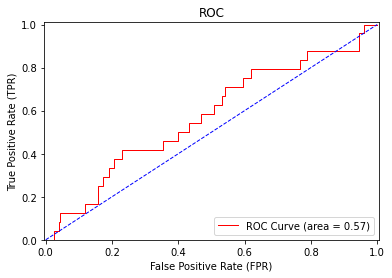

In [48]:
# plotting receiver operating characteristic (ROC) curve
%matplotlib inline

pyplot.figure()

# ROC curve
pyplot.plot(fpr, tpr, color='red', lw=1, label='ROC Curve (area = %0.2f)' % AUC)

# random guess line
pyplot.plot([0,1], [0,1], color='blue', lw=1, linestyle='--')

# range of X and Y axis 
pyplot.xlim([-0.005, 1.005])
pyplot.ylim([0.0, 1.01])

# axis labels
pyplot.xlabel('False Positive Rate (FPR)')
pyplot.ylabel('True Positive Rate (TPR)')

# title and legend
pyplot.title('ROC')
pyplot.legend(loc="lower right")

pyplot.show()

## Final Results
Our most accurate result, through the 5 separate classifications made on the dataset, came from Random Forest 92% accurate predictions using the Track Audio Analysis features. Our findings our as follows
* **Most Accurate Predictions**: Random Forest Classification
* **Least Accurate Predictions**: Decision Tree Classification
* **Most Accurate Feature (in dataset)**: Instrumentalness
* **Most Accurate Feature Pair(s)**: A 3-way tie between (Instrumentalness and Mode), (Instrumentalness and Time Signature), and (Time Signature and Valence)

DT: Decision Tree
KNN: KNN
EL: Ensemble Learning (Bagging)
RF: Random Forest
LR: Logistic Regression
I: Instrumentalness (as an independent KNN feature)



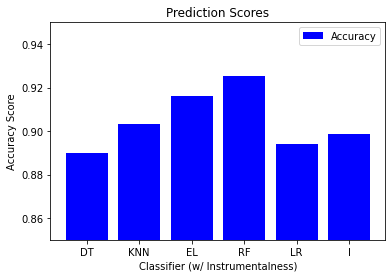

In [49]:
# plotting accuracies of classifiers and Instrumentalness alone
x = ['Decision Tree', 'KNN', 'Ensemble Learning (Bagging)', 'Random Forest', 'Logistic Regression', 'Instrumentalness (as an independent KNN feature)']
x1 = ['DT', 'KNN', 'EL', 'RF', 'LR', 'I']
y1 = [0.8898678414096917, 0.9030837004405287, 0.9162995594713657, 0.9251101321585903, 0.8942731277533039, 0.8986784140969163]

for abbrev, name in zip(x1, x):
    print(f'{abbrev}: {name}')
print()

pyplot.bar(x1, y1, label="Accuracy", color='b')
pyplot.plot()

pyplot.ylim(bottom=0.85,top=0.95)
pyplot.xlabel("Classifier (w/ Instrumentalness)")
pyplot.ylabel("Accuracy Score")
pyplot.title("Prediction Scores")
pyplot.legend()
pyplot.show()